## Assignment 2 - Part 2 - CIVENG 263H Fall 2023
### Erin jones
### Deadline: 9/24/2023

In [75]:
import numpy as np
import pandas as pd
import random as rd
import sys, os
import scipy.io as sio
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [76]:
# set seed 
rd.seed(50)

## Q1

There are 1255 accounts with 96 samples each. The data is a univariate time series -- the only variable captured for each individual is their power consumption over time

In [77]:
df = pd.read_csv('TypicalWeekdayProfile.txt', sep='\t', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
0,0.0271,0.0222,0.0214,0.0144,0.0131,0.0158,0.0156,0.0137,0.0134,0.0113,...,0.0325,0.0456,0.0468,0.0377,0.0427,0.0456,0.0328,0.0316,0.0349,0.0337
1,0.2108,0.2115,0.2108,0.2104,0.2079,0.2081,0.2058,0.2049,0.2050,0.2028,...,0.2069,0.2043,0.2109,0.2143,0.2143,0.2092,0.2102,0.2081,0.2066,0.2050
2,0.0446,0.0458,0.0452,0.0453,0.0438,0.0439,0.0440,0.0451,0.0445,0.0450,...,0.0454,0.0462,0.0457,0.0453,0.0447,0.0452,0.0443,0.0443,0.0449,0.0462
3,0.1083,0.0708,0.0829,0.0594,0.0628,0.0773,0.0679,0.0880,0.0748,0.0410,...,0.1263,0.1478,0.1440,0.1486,0.1537,0.1412,0.1429,0.1041,0.1336,0.1154
4,0.0005,0.0003,0.0003,0.0004,0.0004,0.0002,0.0005,0.0002,0.0003,0.0004,...,0.0003,0.0002,0.0002,0.0004,0.0002,0.0004,0.0004,0.0002,0.0004,0.0003


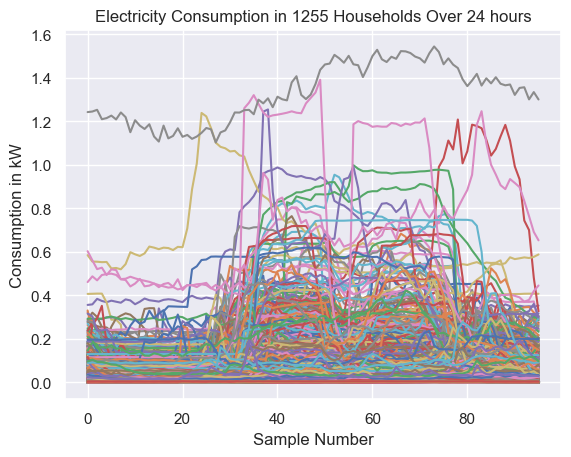

In [189]:
sns.set(style="darkgrid")  # Optional: Set the style of the plot


index = np.linspace(0, 96, 97)

for i in range(0, len(df)):
    sns.lineplot(x= (np.linspace(0, 95, 96)),y=df.iloc[i,:])

# Optional: Customize the plot using Matplotlib
plt.title('Electricity Consumption in 1255 Households Over 24 hours')
plt.xlabel('Sample Number')
plt.ylabel('Consumption in kW')

# Show the plot
plt.show()

## Q2

In [71]:
# Scale data before applying PCA
scaling=StandardScaler()

# Use fit and transform method
scaling.fit(df)
scaled_data=scaling.transform(df)

# Set the n_components=6
pca_electricity=PCA(n_components=6)
pca_6.fit(scaled_data)
projected_data=pca_6.transform(scaled_data)

component_array = pca_6.components_


In [49]:
len(component_array[0])

96

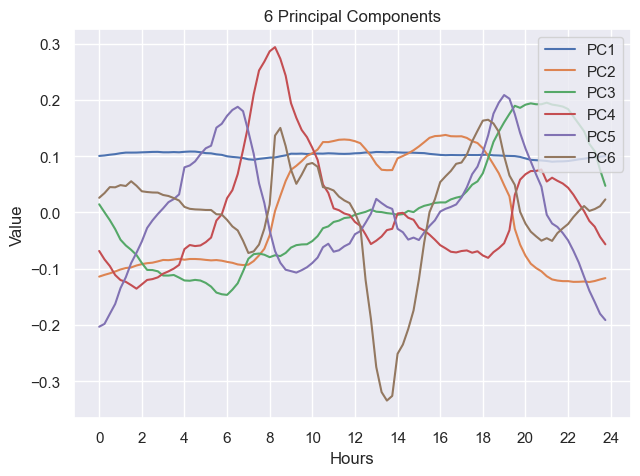

In [50]:
sns.set(style="darkgrid")  # Optional: Set the style of the plot

for i in range(0,6):
    sns.lineplot(x=(((fixed_df.index)*15)/60), y=component_array[i], label=f'PC{i+1}')

# Optional: Customize the plot using Matplotlib
plt.title('6 Principal Components')

x_ticks = range(0, 25, 2)
x_labels = [str(x) for x in x_ticks]
plt.xticks(x_ticks, x_labels)
plt.xlabel('Hours')
plt.ylabel('Value')
plt.legend(loc='upper right')

# Show the plot
plt.show()

## Q3

In [51]:
p_explained = 0

for i in range(0,97):
    if (p_explained < 0.92):
        p_explained += (pca_6.explained_variance_ratio_[0:][i])
    else:
        print(f"The number of components needed to explain at least 92% of the variance in the dataset is {i} components, accounting for {p_explained*100}% of the variance")
        break

The number of components needed to explain at least 92% of the variance in the dataset is 5 components, accounting for 93.36480060694218% of the variance


## Q4

In [221]:
def run_plot_kmeans(n_clusters, projected_data, pca_n):

    # Normalize projections
    frobenius_norm = np.linalg.norm(projected_data, 'fro')
    normalized_projections = projected_data / frobenius_norm

    # Run k-means
    kmeans = KMeans(n_clusters = n_clusters,random_state=1, n_init = 10)
    membership = kmeans.fit_predict(normalized_projections)
    Score = kmeans.score(normalized_projections)
    centers = kmeans.cluster_centers_
    centers_initial_base = pca_n.inverse_transform(centers)

    # create dataframe with projections and their assigned clusters
    standard_pca_df = pd.DataFrame(normalized_projections)
    standard_pca_df['membership'] = pd.Series(membership)

    plt.rcdefaults()
    # plot clusters
    scatter = plt.scatter(x = standard_pca_df.iloc[:,0], y = standard_pca_df.iloc[:,1], c=standard_pca_df['membership'], label='Color')
    # plot centroids
    plt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1], c='aqua',s=50, label='Centroids', edgecolors='black')
    legend = plt.legend(*scatter.legend_elements(), title="Clusters")
    
    plt.xlabel("PC1 Score")
    plt.ylabel("PC2 Score")
    plt.show()

    member_series = pd.Series(membership)
    
    return standard_pca_df, member_series

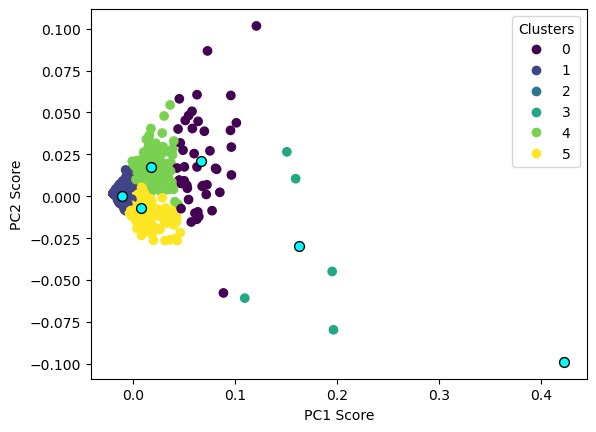

In [222]:
s = run_plot_kmeans(n_clusters = 6, projected_data = projected_data, pca_n = pca_6)

## Q5

In [223]:
cluster_label = s[1].copy()

df_w_members = df.copy()
df_w_members['membership'] = cluster_label

raw_cluster_1 = (df_w_members[df_w_members['membership'] == 0]).copy()
raw_cluster_1.drop(columns=['membership'], inplace=True)

raw_cluster_2 = (df_w_members[df_w_members['membership'] == 1]).copy()
raw_cluster_2.drop(columns=['membership'], inplace=True)

raw_cluster_3 = (df_w_members[df_w_members['membership'] == 2]).copy()
raw_cluster_3.drop(columns=['membership'], inplace=True)

raw_cluster_4 = (df_w_members[df_w_members['membership'] == 3]).copy()
raw_cluster_4.drop(columns=['membership'], inplace=True)

raw_cluster_5 = (df_w_members[df_w_members['membership'] == 4]).copy()
raw_cluster_5.drop(columns=['membership'], inplace=True)

raw_cluster_6 = (df_w_members[df_w_members['membership'] == 5]).copy()
raw_cluster_6.drop(columns=['membership'], inplace=True)

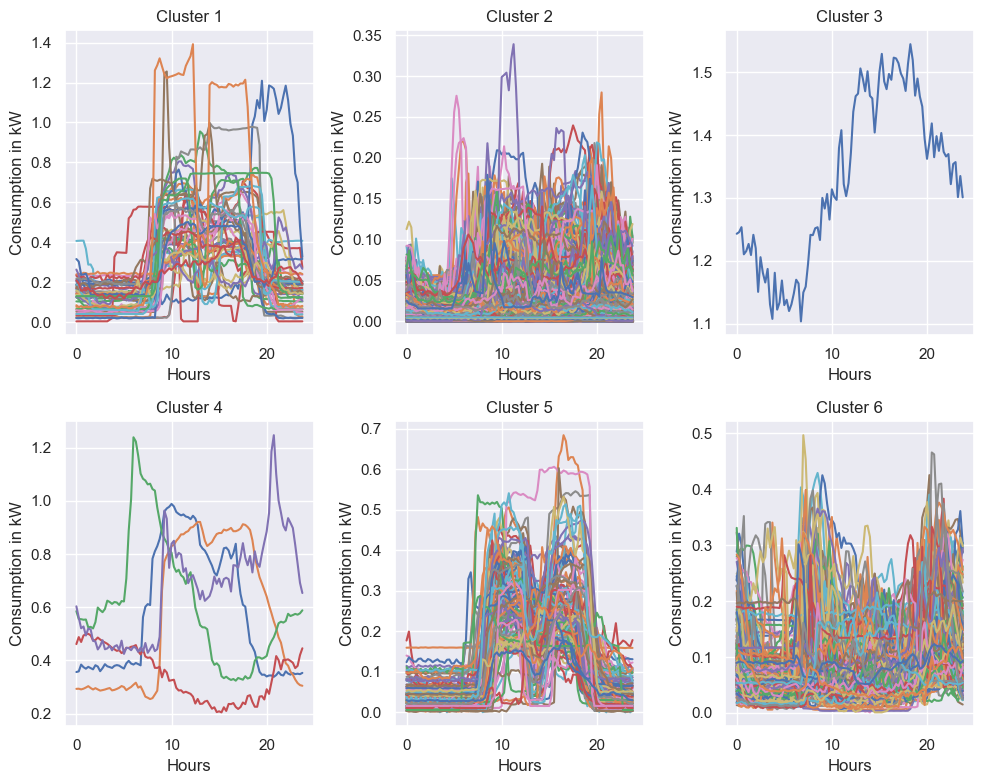

In [224]:
sns.set(style="darkgrid")  # Optional: Set the style of the plot
x_index = (((np.linspace(0, 95, 96))*15)/60)

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(10, 8))

# Plot 1
for i in range(0, len(raw_cluster_1)):
    sns.lineplot(x= x_index,y=raw_cluster_1.iloc[i,:], ax=axes[0,0])
axes[0, 0].set_title(f'Cluster 1')
axes[0, 0].set_xlabel('Hours')
axes[0, 0].set_ylabel('Consumption in kW')

# Plot 2
for i in range(0, len(raw_cluster_2)):
    sns.lineplot(x= x_index,y=raw_cluster_2.iloc[i,:], ax=axes[0,1])
axes[0, 1].set_title(f'Cluster 2')
axes[0, 1].set_xlabel('Hours')
axes[0, 1].set_ylabel('Consumption in kW')

# Plot 3
for i in range(0, len(raw_cluster_3)):
    sns.lineplot(x= x_index,y=raw_cluster_3.iloc[i,:], ax=axes[0,2])
axes[0, 2].set_title(f'Cluster 3')
axes[0, 2].set_xlabel('Hours')
axes[0, 2].set_ylabel('Consumption in kW')

# Plot 4
for i in range(0, len(raw_cluster_4)):
    sns.lineplot(x= x_index,y=raw_cluster_4.iloc[i,:], ax=axes[1,0])
axes[1, 0].set_title(f'Cluster 4')
axes[1, 0].set_xlabel('Hours')
axes[1, 0].set_ylabel('Consumption in kW')

# Plot 5
for i in range(0, len(raw_cluster_5)):
    sns.lineplot(x= x_index,y=raw_cluster_5.iloc[i,:], ax=axes[1,1])
axes[1, 1].set_title(f'Cluster 5')
axes[1, 1].set_xlabel('Hours')
axes[1, 1].set_ylabel('Consumption in kW')

# Plot 6
for i in range(0, len(raw_cluster_6)):
    sns.lineplot(x= x_index,y=raw_cluster_6.iloc[i,:], ax=axes[1,2])
axes[1, 2].set_title(f'Cluster 6')
axes[1, 2].set_xlabel('Hours')
axes[1, 2].set_ylabel('Consumption in kW')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

I believe the following to be true about the raw clustered data:
* Cluster 3 contains some pretty anomalous behavior patterns, so much so that it is in a league of its own
* Cluster 5 appears to have the most clear footprint, despite the densely populated graph. There seems to be a spike in consumption around noon (lunchtime) and then in the evening around 18hr (dinnertime)
* Cluster 4 is also fairly sparsely populated -- similar to cluster 3, the consumption itself is a lot higher in magnitude than other clusters
* Cluster 1 is potentially late risers, as the consumption for most is low until about 10h at which point it spikes and fluctuates
* Cluster 2 consists of those consuming the least when looking at the y axis, however consumption seems to rise starting in late morning and fall late evening (a similar trend to cluster 1, but just at a lower magnitude)
* Finally, cluster 6 constains our night owls who consume lots of electricity after 20h when compared to other clusters. This could also be because they have a solar panel that offsets their consumption during the day or that they are charging an electric vehicle overnight. It could also be driven by a peak-demand pricing plan where individuals are working to consume much less at peak hours, which usually occur around dinner time.